In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv(r'data/studentsPerformance.csv')
df=train.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

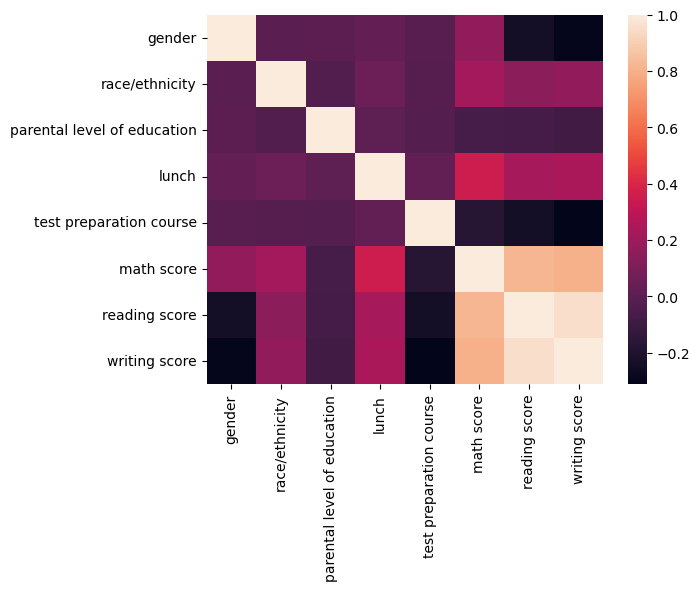

In [29]:
sns.heatmap(df.corr())
plt.show()

In [7]:
df['race/ethnicity'].value_counts()

race/ethnicity
2    319
3    262
1    190
4    140
0     89
Name: count, dtype: int64

/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='gender', ylabel='count'>

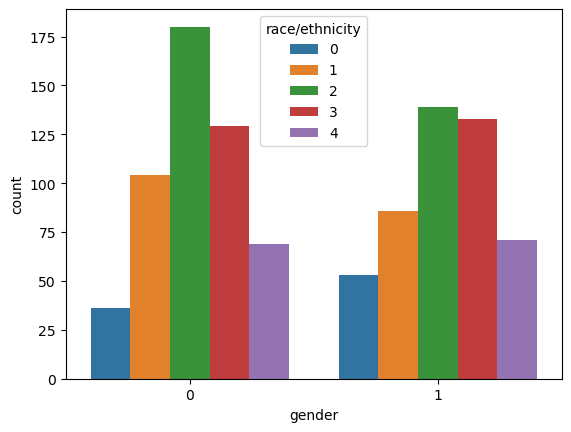

In [8]:
sns.countplot(x="gender",data=df,hue='race/ethnicity') 

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [9]:
df2 = pd.read_csv(r'data/studentsPerformance.csv')
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

gend = ohe.fit_transform(df2[['gender']]).toarray()
df_gend = pd.DataFrame(gend,columns=ohe.categories_)

race = ohe.fit_transform(df2[['race/ethnicity']]).toarray()
df_race = pd.DataFrame(race,columns=ohe.categories_)

parents = ohe.fit_transform(df2[['parental level of education']]).toarray()
df_parents = pd.DataFrame(parents,columns=ohe.categories_)

lunch = ohe.fit_transform(df2[['lunch']]).toarray()
df_lunch = pd.DataFrame(lunch,columns=ohe.categories_)

test = ohe.fit_transform(df2[['test preparation course']]).toarray()
df_test = pd.DataFrame(test,columns=ohe.categories_)

df_gend.head()


,female,male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [25]:
#assign all the columns to df_final
df_final = pd.concat([df2,df_gend,df_race,df_parents,df_lunch,df_test],axis=1)
df_final.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,"(female,)","(male,)",...,"(associate's degree,)","(bachelor's degree,)","(high school,)","(master's degree,)","(some college,)","(some high school,)","(free/reduced,)","(standard,)","(completed,)","(none,)"
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [33]:
# sns.heatmap(df_final.corr())
# plt.show()